In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re

In [3]:
df=pd.read_csv("Output/Sharks_attacks_clean.csv")

In [4]:
df

,date,year,type,country,activity,sex,age,injury,fatal,time
0,Jun,2018,Unprovoked,USA,Others,F,57,"No injury to occupant, outrigger canoe and pad...",No Fatal,Evening
1,Jun,2018,Unprovoked,USA,Others,F,11,Minor injury to left thigh,No Fatal,Afternoon
2,Jun,2018,Unprovoked,USA,Surfing,M,48,Injury to left lower leg from surfboard skeg,No Fatal,Morning
3,Jun,2018,Unprovoked,BRAZIL,Swimming,M,18,FATAL,Fatal,Afternoon
4,Apr,2018,Unprovoked,COSTA RICA,Others,M,30,"No injury, shark bit scuba gear",No Fatal,Morning
...,...,...,...,...,...,...,...,...,...,...
2487,Jan,1863,Unprovoked,AUSTRALIA,Others,M,17,FATAL,Fatal,Evening
2488,Dec,1862,Unprovoked,NEW ZEALAND,Swimming,M,28,Right thigh and left foot severely bitten,No Fatal,Evening
2489,Jul,1862,Unprovoked,SPAIN,Swimming,M,0,FATAL,Fatal,Evening
2490,Feb,1852,Unprovoked,SOUTH AFRICA,NaN,M,0,FATAL. All of the women & children on board su...,Fatal,Evening


# Hipotesis

Los ataques de tiburones estan equilibrados en todo el mundo


## Hipotesis 1

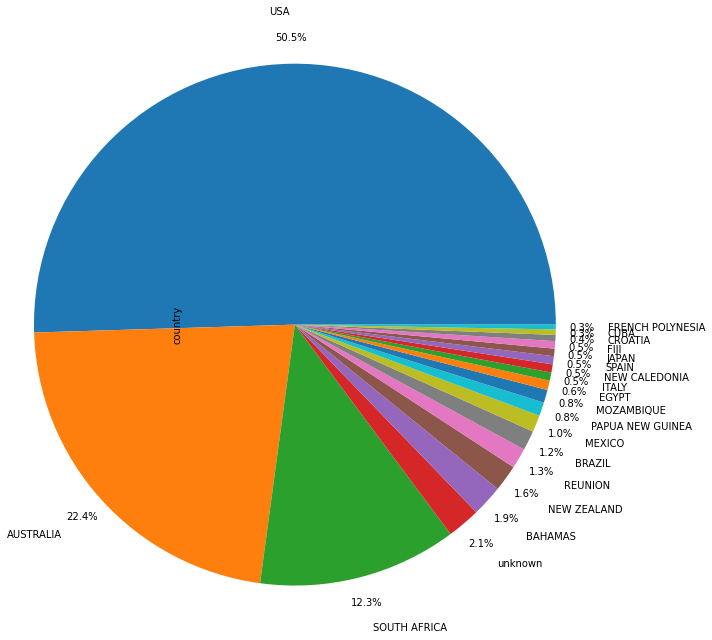

In [180]:
%matplotlib inline

df.country.value_counts()[:20].plot.pie(radius=3,pctdistance=1.1,labeldistance=1.2, autopct='%1.1f%%')

## Hipotesis 2

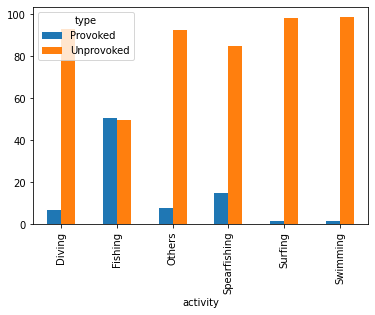

In [126]:
%matplotlib inline
df.groupby(["activity","type"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=False)

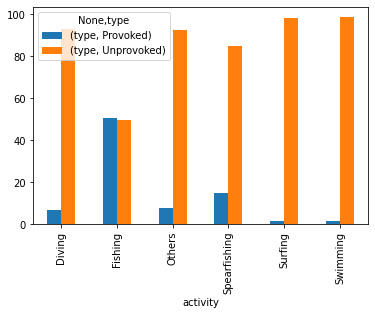

In [184]:
df.groupby(["activity","type"]).agg({"type":"count"}).groupby(level=0,group_keys=True).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=False)

In [176]:
df.groupby(["activity","type"]).agg({"type":"count"}).groupby(level=1).apply(
    lambda x: 100 * x / x.sum())

type
activity     type                 
Diving       Provoked     2.673797
             Unprovoked   3.019538
Fishing      Provoked    36.363636
             Unprovoked   2.975133
Others       Provoked    35.294118
             Unprovoked  35.612789
Spearfishing Provoked    16.042781
             Unprovoked   7.504440
Surfing      Provoked     5.882353
             Unprovoked  28.952043
Swimming     Provoked     3.743316
             Unprovoked  21.936057

In [177]:
df.groupby(["activity","type"]).agg({"type":"count"}).groupby(level=0).apply(
    lambda x: 100 * x / x.sum())

type
activity     type                 
Diving       Provoked     6.849315
             Unprovoked  93.150685
Fishing      Provoked    50.370370
             Unprovoked  49.629630
Others       Provoked     7.603687
             Unprovoked  92.396313
Spearfishing Provoked    15.075377
             Unprovoked  84.924623
Surfing      Provoked     1.659125
             Unprovoked  98.340875
Swimming     Provoked     1.397206
             Unprovoked  98.602794

In [128]:
df.groupby(["activity","type"]).agg({"type":"count"})

type
activity     type            
Diving       Provoked       5
             Unprovoked    68
Fishing      Provoked      68
             Unprovoked    67
Others       Provoked      66
             Unprovoked   802
Spearfishing Provoked      30
             Unprovoked   169
Surfing      Provoked      11
             Unprovoked   652
Swimming     Provoked       7
             Unprovoked   494